### Chapter4 Feature Engineering

### 4.4 일변량 비선형 변환

log, exp, sin같으 수학 함수를 적용하는 방법도 특성 변환에 유용하다. **트리 기반 모델은, 튻성의 순서에만 영향을 받지만 선형모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관.**

그리고 특성값과 타깃값 사이에 비선형성이 있으면, 선형회귀에서는 모델 만들기 어려움. **log, exp 함수는 데이터의 스케일을 변경해, 선형 모델과 신경망의 성능을 향상시키는데 도움.**

**sin, cos 함수는 주기적인 패턴이 있는 데이터를 다룰 때 편리.**

특성이 정규분포와 비슷할때, 대부분의 모델은 최고의 성능을 나타냄. 카운트 데이터라면 "사용자가 얼마나 자주 로그인 하는가?"와 같은 특성. 이때, 카운트에는 음수가 없으며 특별한 통계 패턴을 따르는 경우가 많음. 실제 데이터의 속성과 비슷한 카운트를 만들어 예제 수행.

In [1]:
import numpy as np


rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))

In [2]:
w = rnd.normal(size=3)

In [3]:
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


첫 번째 ,특성 맨 앞 10개를 살펴보면 모두 양의 정수이지만 특정한 패턴은 보이지 않음. 하지만 각 값이 나타난 횟수를 세면 그 분포가 잘 드러남.

In [4]:
print("Feature Counts: \n{}".format(np.bincount(X[:, 0])))

Feature Counts: 
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


위를 보면, 2가 68번으로 가장 많으며, 큰 값의 수는 빠르게 줄어든다.

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Value')

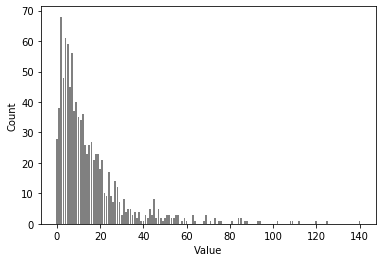

In [17]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Count")
plt.xlabel("Value")

X[:1], X[:2]특성도 비슷. 이런 종류의 분포는 실제로 자주 나타남. 카운트 데이터의 전형적인 분포는 푸아송(Poisson)분포이다. 
푸아송 분포는 단위 시간안에 일어날 이벤트 횟수를 표현하는 확률 분포. 이 예에서는 타깃값을 만들기 위해 먼저 정규분포를 만들고, 그 다음 poisson함수를 적용함. 

In [21]:
import os
import pandas as pd
import mglearn

data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
                  header=None, index_col=False,
                  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'gender',
                        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [23]:
# 예제 를 위한 데이터 셋
df = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

In [24]:
# pandas에서는 get_dummies함수를 사용해서, 데이터를 매우 쉽게 인코딩 가능.
# get_dummies 함수는 객체 타입(문자열 같은)이나 범주형을 가진 열을 자동으로 변환
print("원본 특성: \n", list(df.columns), "\n")
data_dummies = pd.get_dummies(df)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_

In [25]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Numpy Array 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}   y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)   y.shape: (32561,)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test Score: {:.3f}".format(score))

Test Score: 0.252


In [28]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

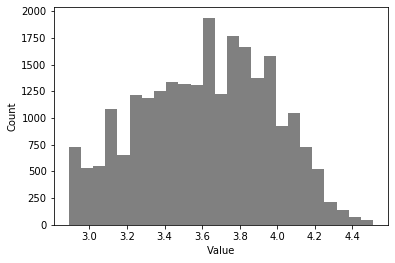

In [29]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Count")
plt.xlabel("Value")

In [30]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test Score: {}".format(score))

Test Score: 0.2554701921054203


### 4.5 특성 자동 선택

데이터의 차원이 추가되면, 모델은 더 복잡해지고 과적합될 가능성도 높아진다. 

새로운 특성을 추가하거나 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 특성의 수를 줄이면 **일반화 성능**이 올라간다. 

이를 위해서, **Univariate Statistics (일변량 통계), Model-Based Selection (모델 기반 선택), Iterative Selection (반복적 선택)**이 있다.

#### 4.5.1 일변량 통계

일변량 통계에서는, 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산.

**분류에서는 분산분석 (ANOVA, Analysis of Variance)이라고 함.**

이 방법의 핵심 요소는 **일변량,** 즉 각 특성이 독립적으로 평가된단느 점. 따라서 **다른 특성과 깊게 연관된 특성은 선택되지 않음.**

일변량 분석은 계산이 매우 빠르고, 평가를 위해 모델을 만들 필요가 없다. 한편, 이 방식은 특성을 선택한 후 적용하려는 모델에 상관없이 사용할 수 있음.

scikit-learn에서 일변량 분석으로, 특성을 선택하려면 분류에서는 f_classif(기본값)를, 회귀에서는 f_regression을 보통 선택하여 테스트하고, 계산한 **p-vlaue** 에 기초하여 특성을 제외하는 방식을 선택한다.

이런 방식으로 **매우 높은 p-value** 가진( 즉 타깃값과 연관성이 작을 것 같다는 ) 특성을 제외할 수 있도록 임계값을 조정하는 매개변수를 사용함. 임계깞ㅇ를 계싼하는 방식은 각각 다르며, 가장 간단한 SelectKBest는 고정된 k개의 특성을 선택하고 SelectPercentile은 지정된 비율만큼 특성을 선택. 

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가.
# 처음 30개는 원본 특성이고, 다음 50개는 노이즈.
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_Test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

# f_classif(기본값) 와 SelectPercentile을 사용하며, 특성의 50% 선택한다.
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용.
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Feature Number')

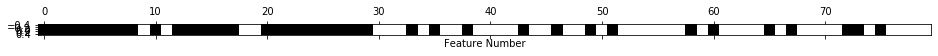

In [34]:
# get_support 메서는 선택된 특성을 불리언 값으로 표시해주어, 어떤 특성이 선택되었는지 확인할 수 있음.

mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Number")

마스킹된 그래프에서 볼 수 있듯이, 선택된 특성은 대부분 원본 특성이고, 노이즈 특성이 거의 모두 제거. 그러나 원본 특성이 완벽히 복원된 것은 아니다. 전체 특성을 이용했을 때, 선택된 특성만 사용했을 때, 로지스틱 회귀의 성능을 비교해보면,